In [1]:
import os


In [2]:
os.chdir("D:/DataScience/Class/Jupyter")

In [3]:
os.getcwd()

'D:\\DataScience\\Class\\Jupyter'

### Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### importing data set

In [5]:
computer=pd.read_csv("D:/DataScience/Class/assignment working/MLR/Computer_Data.csv")

### EDA

In [6]:
computer.head(10)

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
5,6,3695,66,340,16,14,no,no,yes,94,1
6,7,1720,25,170,4,14,yes,no,yes,94,1
7,8,1995,50,85,2,14,no,no,yes,94,1
8,9,2225,50,210,8,14,no,no,yes,94,1
9,10,2575,50,210,4,15,no,no,yes,94,1


In [7]:
computer.multi.value_counts()

no     5386
yes     873
Name: multi, dtype: int64

In [8]:
computer.isna().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

In [9]:
computer.premium=computer.premium.map({"yes":1,"no":0})
computer.multi=computer.multi.map({"yes":1,"no":0})
computer.cd=computer.cd.map({"yes":1,"no":0})
                    


In [10]:
computer.describe(include="all")

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [11]:
computer.cd.value_counts()

0    3351
1    2908
Name: cd, dtype: int64

In [12]:
computer.premium.value_counts()

1    5647
0     612
Name: premium, dtype: int64

In [13]:
computer.multi.value_counts()

0    5386
1     873
Name: multi, dtype: int64

In [14]:
computer.var()

Unnamed: 0    3.265112e+06
price         3.373332e+05
speed         4.476498e+02
hd            6.684730e+04
ram           3.170928e+01
screen        8.192336e-01
cd            2.487874e-01
multi         1.200439e-01
premium       8.823252e-02
ads           5.600320e+03
trend         6.199962e+01
dtype: float64

In [15]:
computer=computer.drop("multi",axis=1)

In [16]:
computer.describe()

,Unnamed: 0,price,speed,hd,ram,screen,cd,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.902221,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.297040,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,1.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,1.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,1.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,339.000000,35.000000


checking for duplicate cells


In [17]:
computer.duplicated().sum()

0

checking outliers

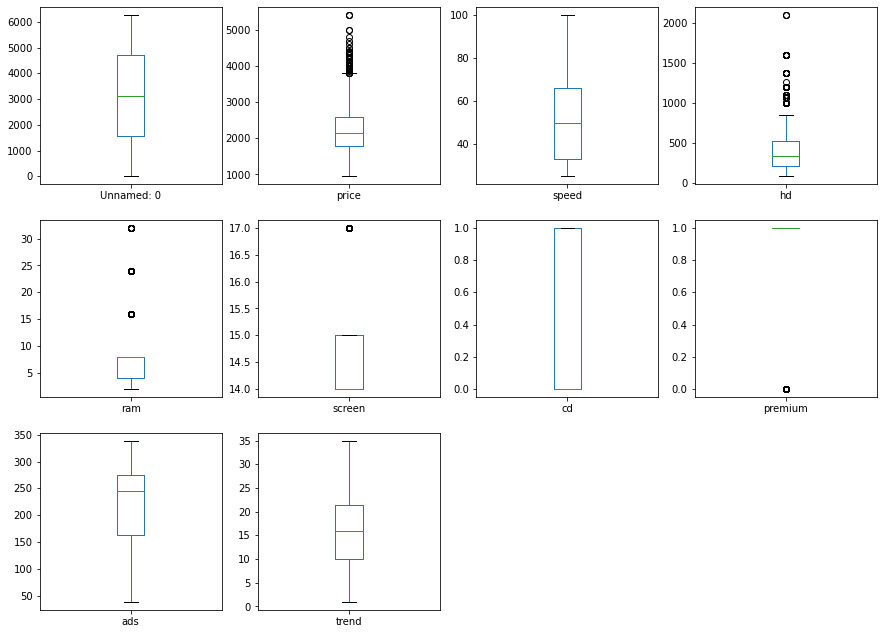

In [18]:
computer.plot(kind="box",figsize=(15,15),subplots=True,layout=(4,4))
plt.show()

In [19]:
computer=computer.drop("Unnamed: 0",axis=1)

In [20]:
from feature_engine.outliers import Winsorizer

In [21]:
win=Winsorizer(capping_method="iqr",fold=1.5)

In [22]:
computer=win.fit_transform(computer)

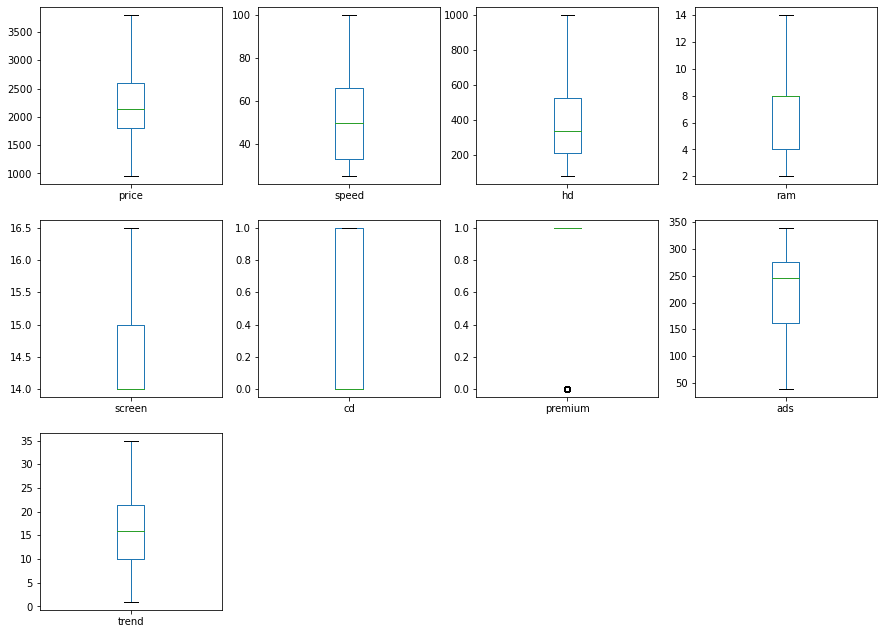

In [23]:
computer.plot(kind="box",figsize=(15,15),subplots=True,layout=(4,4))
plt.show()

### Doing visualisation

In [24]:
import seaborn as sns

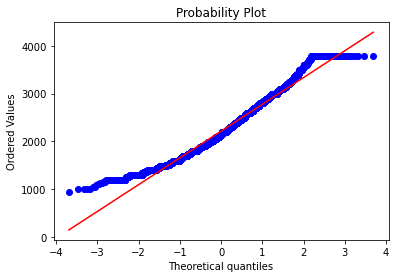

In [25]:
from scipy import stats
stats.probplot(computer["price"],dist="norm",plot=plt)
plt.show()


In [26]:
computer["price"]=np.log(computer.price)

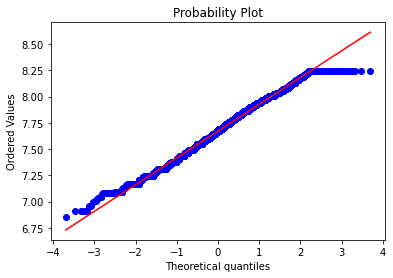

In [27]:
stats.probplot(computer["price"],dist="norm",plot=plt)
plt.show()

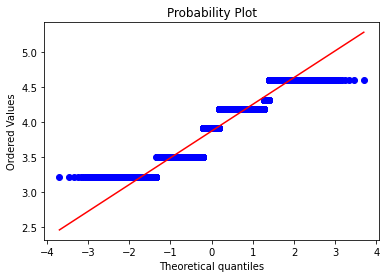

In [28]:
stats.probplot(np.log(computer["speed"]),dist="norm",plot=plt)
plt.show()

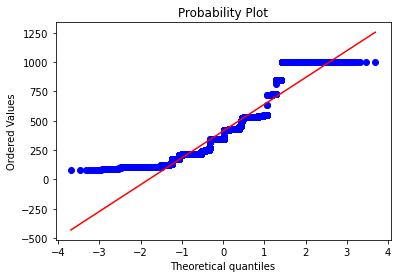

In [29]:
stats.probplot(computer["hd"],dist="norm",plot=plt)
plt.show()

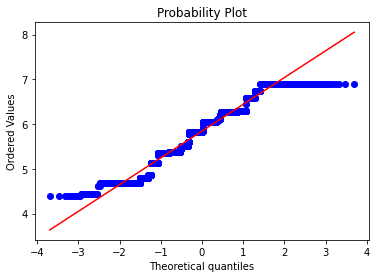

In [30]:
stats.probplot(np.log(computer["hd"]),dist="norm",plot=plt)
plt.show()
computer["hd"]=np.log(computer["hd"])

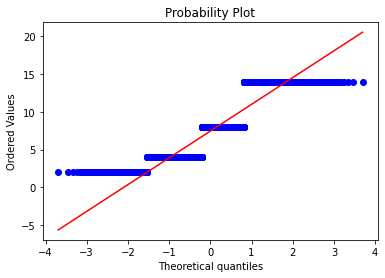

In [31]:
stats.probplot(computer["ram"],dist="norm",plot=plt)
plt.show()

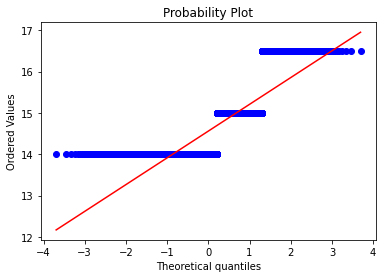

In [32]:
stats.probplot(computer["screen"],dist="norm",plot=plt)
plt.show()

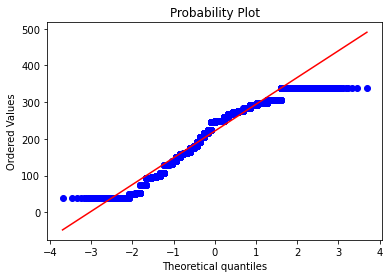

In [33]:
stats.probplot(computer["ads"],dist="norm",plot=plt)
plt.show()

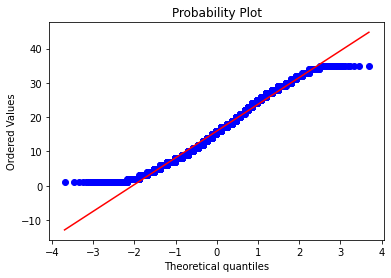

In [34]:
stats.probplot(computer["trend"],dist="norm",plot=plt)
plt.show()

In [35]:

def norm(x):
    z=(x-x.min())/(x.max()-x.min())
    return z


In [36]:
computer=norm(computer)


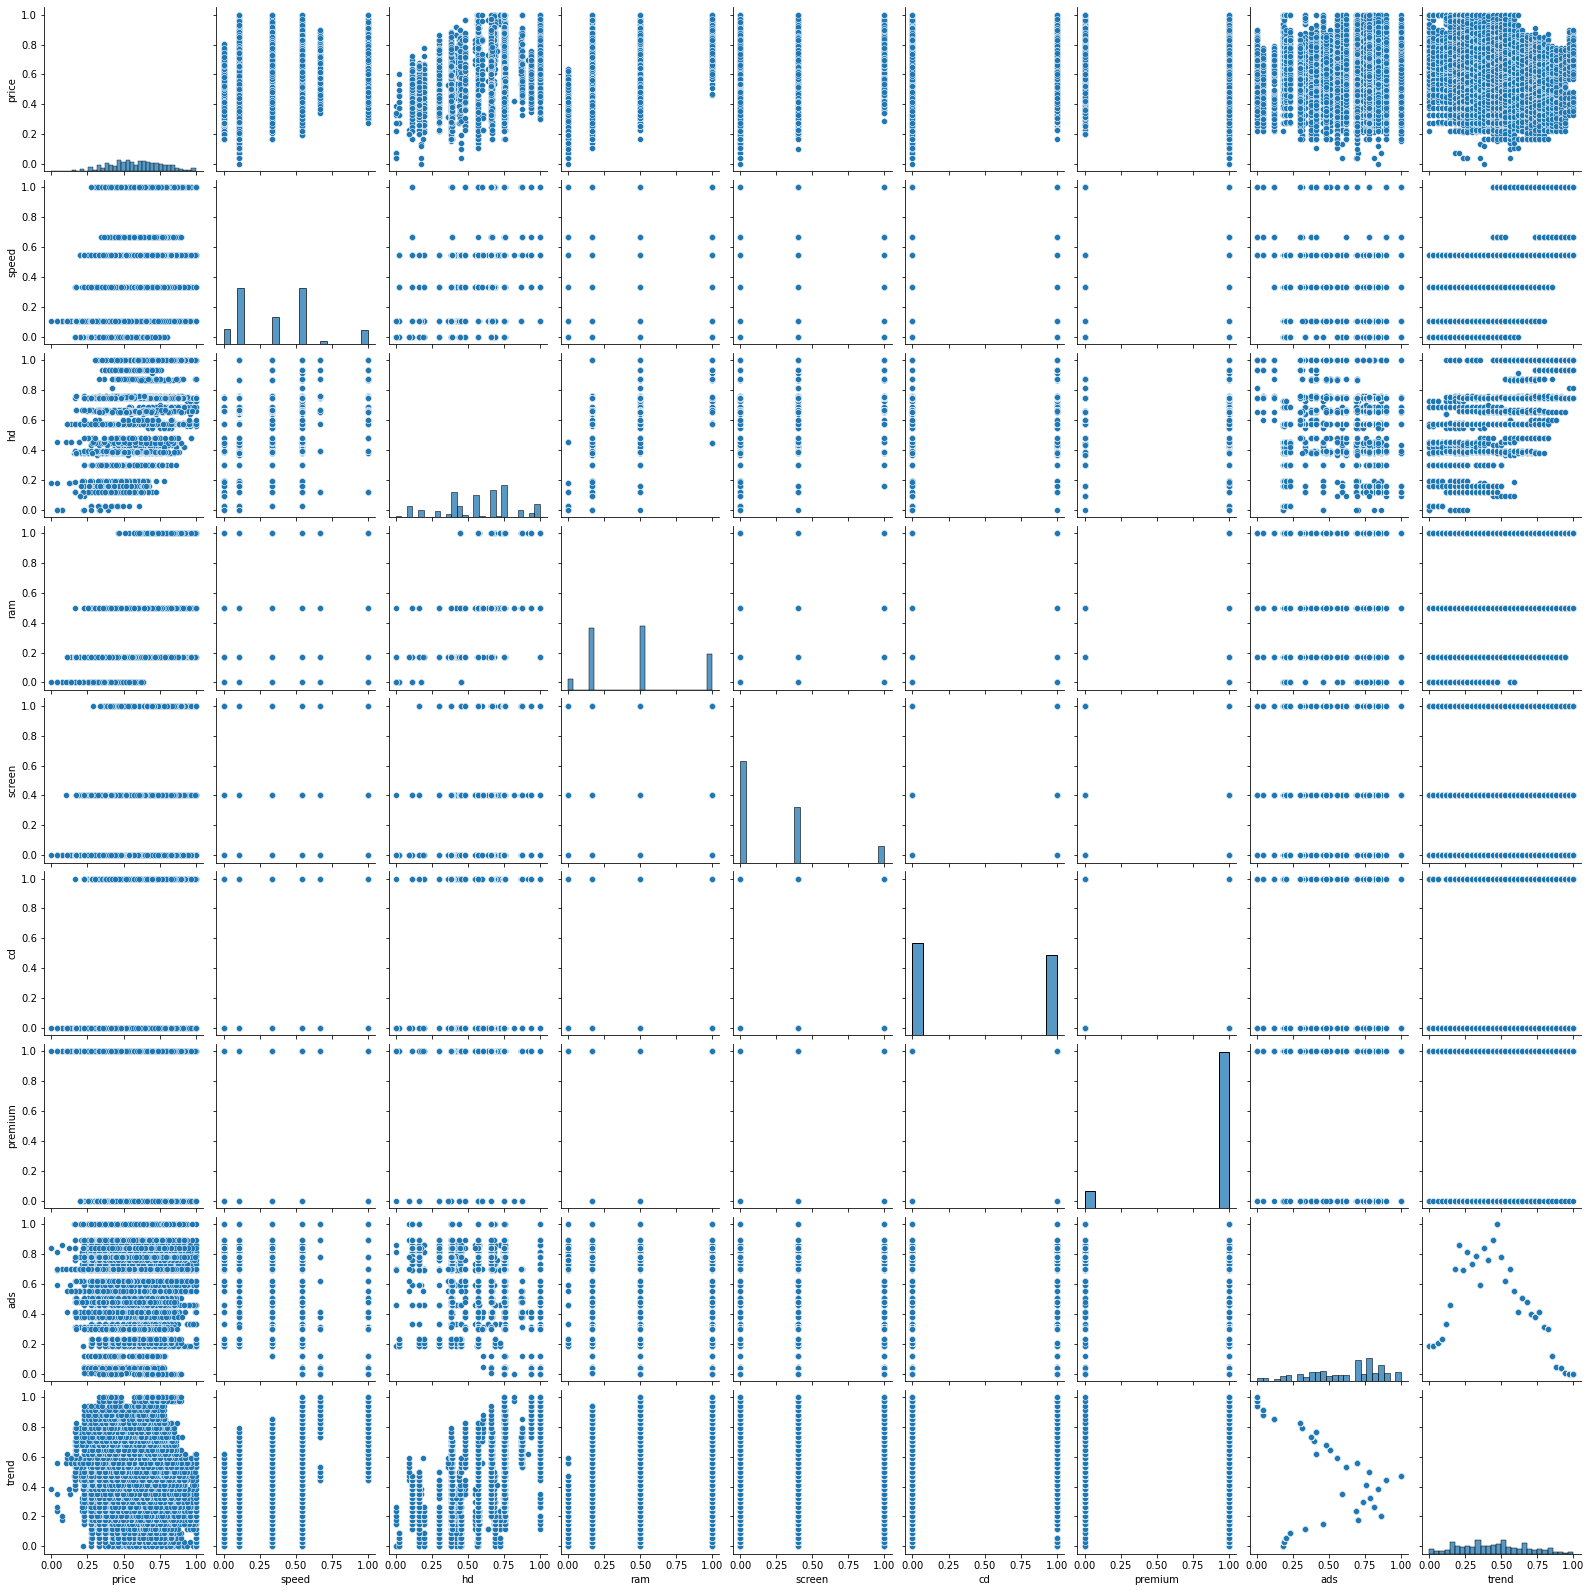

In [37]:
sns.pairplot(computer)
plt.show()

checking correlation coefficient value

In [38]:
computer.corr()

,price,speed,hd,ram,screen,cd,premium,ads,trend
price,1.000000,0.310302,0.465079,0.652968,0.299394,0.228231,-0.075002,0.054034,-0.198733
speed,0.310302,1.000000,0.392543,0.259639,0.201290,0.258260,0.114208,-0.215232,0.405438
hd,0.465079,0.392543,1.000000,0.756718,0.276372,0.517207,0.216591,-0.252648,0.563844
ram,0.652968,0.259639,0.756718,1.000000,0.237500,0.447773,0.213849,-0.151541,0.236012
screen,0.299394,0.201290,0.276372,0.237500,1.000000,0.140999,0.027501,-0.101196,0.199517
cd,0.228231,0.258260,0.517207,0.447773,0.140999,1.000000,0.216077,-0.061091,0.445780
premium,-0.075002,0.114208,0.216591,0.213849,0.027501,0.216077,1.000000,-0.152023,0.042107
ads,0.054034,-0.215232,-0.252648,-0.151541,-0.101196,-0.061091,-0.152023,1.000000,-0.318553
trend,-0.198733,0.405438,0.563844,0.236012,0.199517,0.445780,0.042107,-0.318553,1.000000


In [39]:
computer.cov()

,price,speed,hd,ram,screen,cd,premium,ads,trend
price,0.033974,0.016135,0.020736,0.039114,0.017234,0.020983,-0.004106,0.002484,-0.008483
speed,0.016135,0.079582,0.026787,0.023804,0.017733,0.036339,0.009570,-0.015146,0.026488
hd,0.020736,0.026787,0.058514,0.059489,0.020878,0.062404,0.015563,-0.015245,0.031587
ram,0.039114,0.023804,0.059489,0.105618,0.024104,0.072584,0.020644,-0.012285,0.017763
screen,0.017234,0.017733,0.020878,0.024104,0.097526,0.021963,0.002551,-0.007883,0.014430
cd,0.020983,0.036339,0.062404,0.072584,0.021963,0.248787,0.032014,-0.007601,0.051493
premium,-0.004106,0.009570,0.015563,0.020644,0.002551,0.032014,0.088233,-0.011264,0.002897
ads,0.002484,-0.015146,-0.015245,-0.012285,-0.007883,-0.007601,-0.011264,0.062226,-0.018403
trend,-0.008483,0.026488,0.031587,0.017763,0.014430,0.051493,0.002897,-0.018403,0.053633


### Bulding model

In [40]:
import statsmodels.formula.api as smf 

In [41]:
computer.columns.values

array(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'premium', 'ads',
       'trend'], dtype=object)

In [42]:
ml1=smf.ols('price ~  speed + hd + ram + screen + cd + premium + ads + trend' , data=computer).fit()

In [43]:
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2910.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:04:56   Log-Likelihood:                 6563.4
No. Observations:                6259   AIC:                        -1.311e+04
Df Residuals:                    6250   BIC:                        -1.305e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5763      0.006     96.700      0.0

In [44]:
pred_1=ml1.predict(computer)
pred_1

0       0.449978
1       0.438776
2       0.576594
3       0.789293
4       0.839480
          ...   
6254    0.429682
6255    0.553238
6256    0.664310
6257    0.645560
6258    0.704233
Length: 6259, dtype: float64

In [45]:
err_1=computer["price"]-pred_1
sq_err_1= err_1**2
sme_1=np.mean(sq_err_1)
rmse_1=np.sqrt(sme_1)
rmse_1

0.08478987342660432

MLR-1 
p value =0
rquared=0.788
adj rsquared=0.788
aic=-13111
rmse=0.084

checking influential values


In [46]:
import statsmodels.api as sm

<Figure size 2160x2160 with 0 Axes>

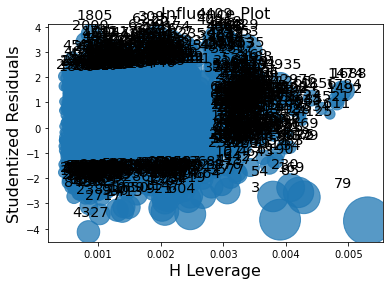

In [47]:
plt.figure(figsize=(30,30))
sm.graphics.influence_plot(ml1)
plt.show()

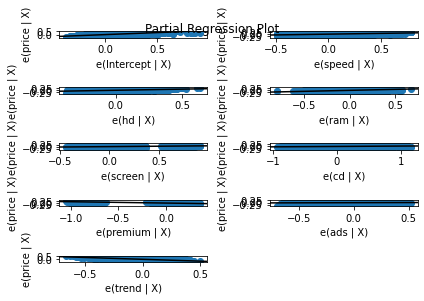

In [48]:
sm.graphics.plot_partregress_grid(ml1)
plt.show()

In [49]:
comp_1=computer.drop([79,3,54],axis=0)

In [50]:
ml_2=smf.ols('price ~  speed + hd + ram + screen + cd + premium + ads + trend' , data=comp_1).fit()

In [51]:
ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2928.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:05:09   Log-Likelihood:                 6576.1
No. Observations:                6256   AIC:                        -1.313e+04
Df Residuals:                    6247   BIC:                        -1.307e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5800      0.006     97.034      0.000       0.568       0.592
speed          0.2034      0.004     47.418      0.000       0.195       0.212
hd             0.2916      0.009     33.607      0.000       0.275       0.309
ram            0.2409      0.006     43.701      0.000       0.230       0.252
screen         0.0976      0.004     27.112      0.000       0.091       0.105
cd             0.0410      0.003     15.256      0.000       0.036       0.046
premium       -0.1736      0.004    -45.526      0.000      -0.181      -0.166
ads            0.0285      0.005      6.105      0.000       0.019       0.038
trend         -0.5577      0.007    -84.126      0.000      -0.571      -0.545
==============================================================================
Omnibus:                       58.934   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.420
Skew:                           0.185   Prob(JB):                     2.29e-15
Kurtosis:                       3.349   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
pred_2=ml_2.predict(comp_1)
err_2=comp_1["price"]-pred_2
sq_err_2= err_2**2
sme_2=np.mean(sq_err_2)
rmse_2=np.sqrt(sme_2)
rmse_2

0.08457567078430328

MLR-2
p value =0
rquared=0.789
adj rsquared=0.789
aic=-13131
rmse=0.0845

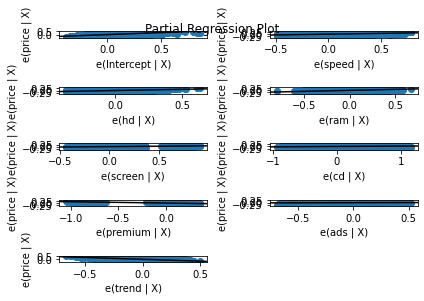

In [53]:
sm.graphics.plot_partregress_grid(ml_2)
plt.show()

In [54]:
ml_3=smf.ols('price ~  speed + hd + ram + cd  + premium +ads+ trend + screen' , data=computer).fit()

In [55]:
ml_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2910.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:05:10   Log-Likelihood:                 6563.4
No. Observations:                6259   AIC:                        -1.311e+04
Df Residuals:                    6250   BIC:                        -1.305e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5763      0.006     96.700      0.000       0.565       0.588
speed          0.2037      0.004     47.349      0.000       0.195       0.212
hd             0.2931      0.009     33.715      0.000       0.276       0.310
ram            0.2398      0.006     43.419      0.000       0.229       0.251
cd             0.0407      0.003     15.130      0.000       0.035       0.046
premium       -0.1719      0.004    -45.103      0.000      -0.179      -0.164
ads            0.0303      0.005      6.485      0.000       0.021       0.039
trend         -0.5565      0.007    -83.783      0.000      -0.570      -0.543
screen         0.0978      0.004     27.106      0.000       0.091       0.105
==============================================================================
Omnibus:                       57.797   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.270
Skew:                           0.172   Prob(JB):                     1.50e-15
Kurtosis:                       3.378   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ml3 almost same as ml2

In [56]:
rsq_sp = smf.ols('speed ~ hd + ram + screen + cd  + premium + ads + trend', data = computer).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

rsq_hd = smf.ols('hd~ speed  + ram + screen + cd + premium + ads + trend', data = computer).fit().rsquared  
vif_hd = 1/(1 - rsq_hd)

rsq_rm = smf.ols('ram~ hd+ speed + screen + cd  + premium + ads + trend', data = computer).fit().rsquared  
vif_rm = 1/(1 - rsq_rm) 



In [57]:
print(vif_sp,vif_hd,vif_rm)

1.2796544053826824 3.8433302383124217 2.799791495845318


### Best Model

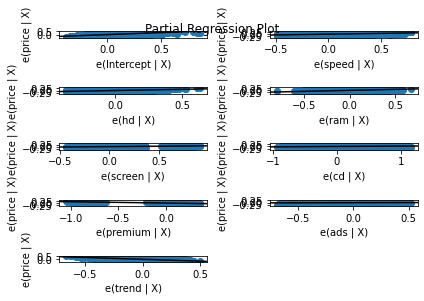

In [58]:
# Final model
final_ml = ml_2
 
sm.graphics.plot_partregress_grid(final_ml)
plt.show()

In [59]:
# Prediction
pred = final_ml.predict(computer)

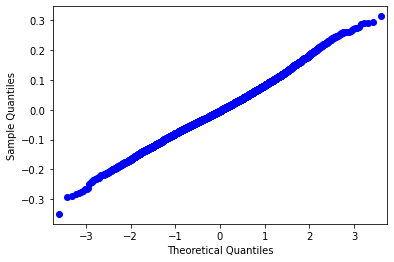

In [60]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()


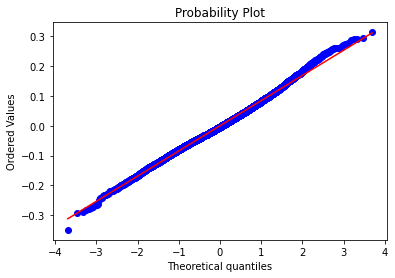

In [61]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = plt)
plt.show()


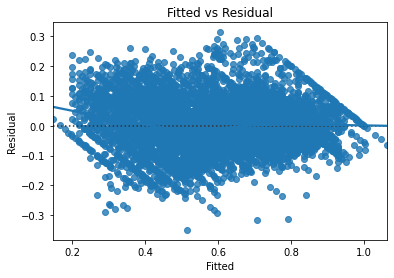

In [62]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = computer.price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

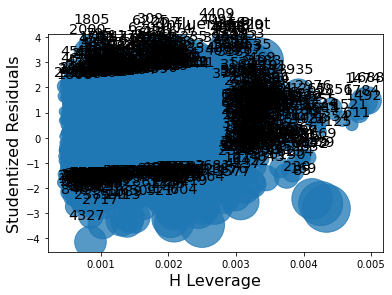

In [63]:
sm.graphics.influence_plot(final_ml)
plt.show()

In [64]:

### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
com_train, com_test = train_test_split(comp_1, test_size = 0.2,random_state=125) 

In [65]:
# preparing the model on train data 
model_train = smf.ols('price ~  speed + hd + ram + screen + cd + premium + ads + trend' , data=com_train).fit()

In [66]:
# prediction on train data set 
train_pred = model_train.predict(com_train)

In [67]:
# train residual values 
train_resid = train_pred - com_train.price

In [68]:
# RMSE value for test data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.08560670404357554

In [69]:
# test_data prediction
test_pred = model_train.predict(com_test)

In [70]:
test_resid = test_pred - com_test.price

In [71]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.08039128982188272